In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train = datasets.MNIST('', download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('', download=False,
                     transform=transforms.Compose([transforms.ToTensor()]))

100.1%

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


113.5%

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


100.4%

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


180.4%

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=28, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=28, shuffle=True)

In [4]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
# retrieving last data from memory of the For loop
x, y = data[0][0], data[1][0]
print(y)

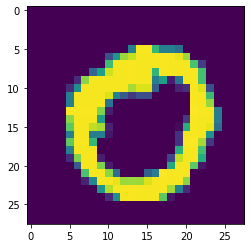

In [12]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28, 28))
plt.show()

In [10]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [13]:
# blancing the data. Checking the percent of each feature(category) count
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total+=1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [14]:
for i in counter_dict:
    print(f'{i}: {counter_dict[i]/total*100}')

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


## Part 3 - Building our Neural Network

In [15]:
import torch.nn as nn
import torch.nn.functional as F

In [18]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [19]:
X = torch.rand((28, 28))

# Here `-1` specifices this input will of an unKnown shape
X = X.view(-1, 28*28)

In [20]:
output = net(X)

In [21]:
output

tensor([[-2.3709, -2.3232, -2.2772, -2.3288, -2.3405, -2.2326, -2.3492, -2.2963,
         -2.3023, -2.2163]], grad_fn=<LogSoftmaxBackward>)

## Part 4 - Training Model

In [22]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.1257, grad_fn=<NllLossBackward>)
tensor(0.0489, grad_fn=<NllLossBackward>)
tensor(0.1379, grad_fn=<NllLossBackward>)


In [23]:
# Check the accuracy of the above model

corrent = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                corrent += 1
            total += 1

print('Accuracy: ', round(corrent/total, 3))

Accuracy:  0.975


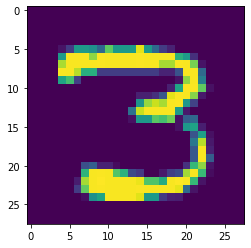

tensor(3)


In [30]:
plt.imshow(X[7].view(28, 28))
plt.show()

print(y[7])

In [37]:
print(torch.argmax(net(X[7].view(-1, 784))[0]))

tensor(3)
